In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
# Normalise data

x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [32]:
# ============================================================================
# STEP 6: Build The Model
# ============================================================================

model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    
    layers.Reshape((28, 28, 1)),
    #Hidden Layer 1
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    #Hidden Layer 2
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(), 

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
# Train the model

h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 165s 15ms/step - loss: 0.2344 - accuracy: 0.9307 - val_loss: 0.0825 - val_accuracy: 0.9756
Epoch 2/5
657/657 [==============================] - 10s 15ms/step - loss: 0.0658 - accuracy: 0.9799 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 3/5
657/657 [==============================] - 8s 13ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 4/5
657/657 [==============================] - 8s 13ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0540 - val_accuracy: 0.9829
Epoch 5/5
657/657 [==============================] - 9s 13ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0485 - val_accuracy: 0.9853


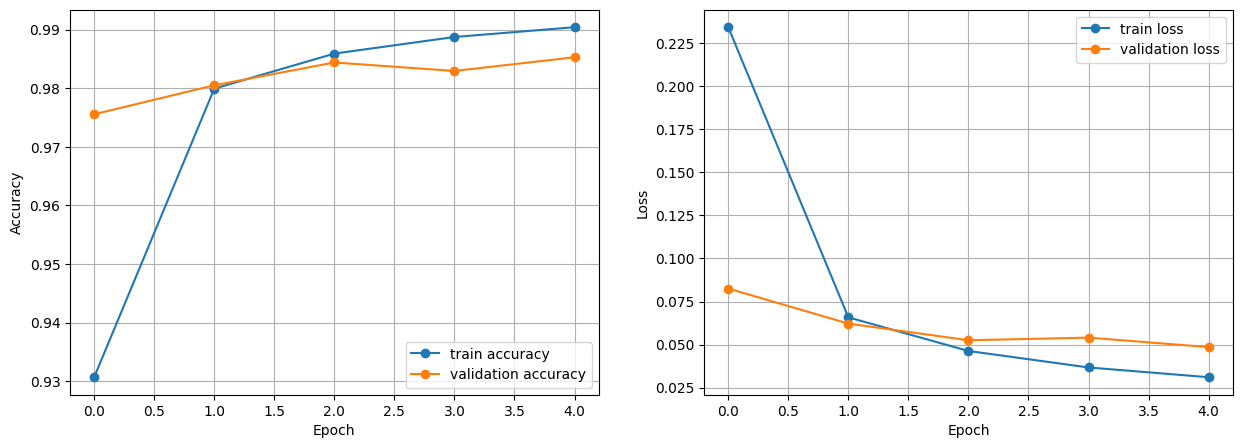

In [35]:
# STEP 9: Plot the training results

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [36]:
# STEP 10: Evaluate the model on the test dataset

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9881

Test accuracy: 0.988099992275238


In [38]:
# STEP 11: Make predictions on the entire test images

predictions = model.predict(x_test)

313/313 [==============================] - 0s 787us/step


3/3 [==============================] - 0s 6ms/step


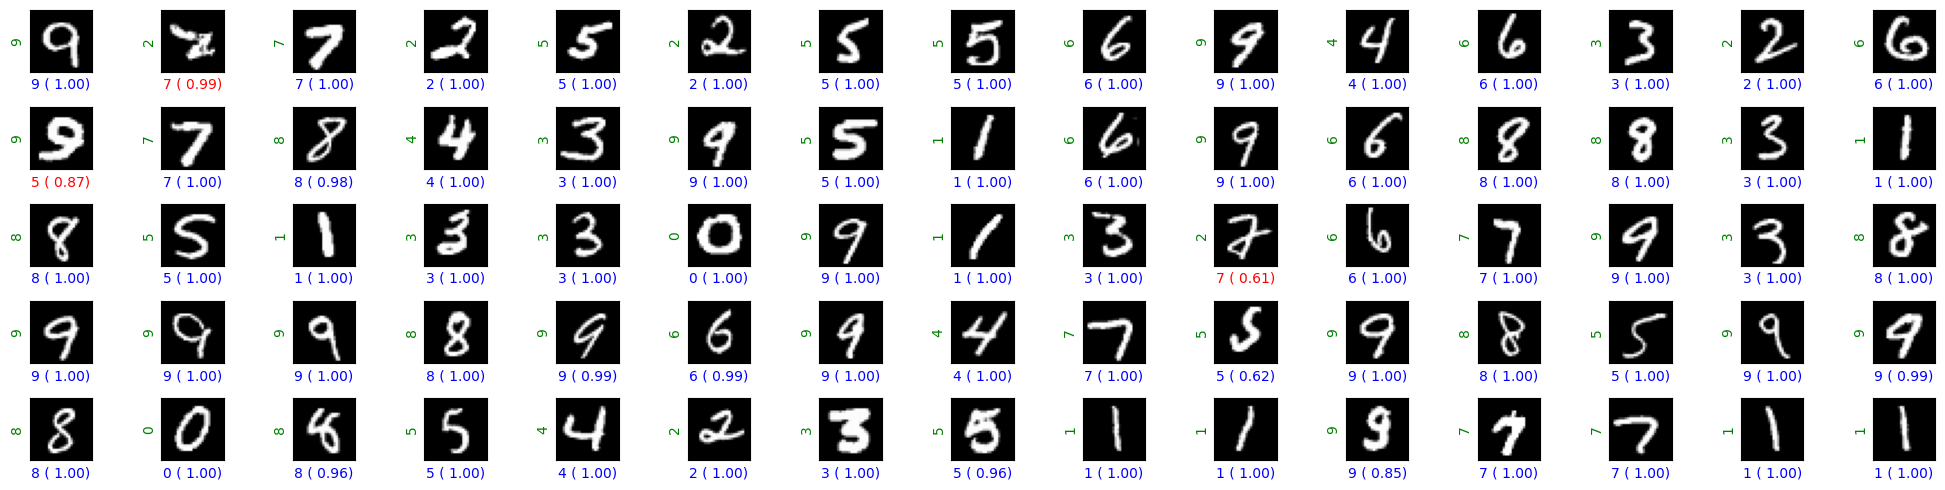

In [39]:
ROWS =5
COLS = 15

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [40]:
# STEP 12: Predict a single image

def test(i):
    img = x_test[i]
    # Corrected line to remove UserWarning by passing the reshaped tensor directly
    predictions = model.predict(img.reshape(-1,784))

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 [==============================] - 0s 30ms/step


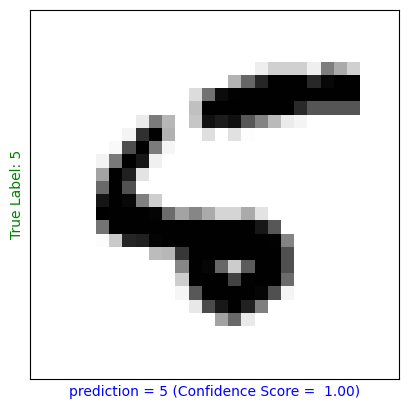

In [41]:
test(8)

In [42]:
save_path = "Models/mnist_digit_model.keras"
model.save(save_path)
print("Saved to:", save_path)

Saved to: Models/mnist_digit_model.keras
